<h3 style='color:purple' align='center'>Random Forest classification of absorption of monoclonal antibodies (mAbs) </h3>

<img src="mAbs.jpg" width="500" height="600" />

**Importing libraries**

In [83]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

**Obtaining data**

In [84]:
data = pd.read_csv('mAbs.csv')
data

,Drug Name,Dose(mg),Injection method,Injection site,AUC ratio,Cmax Ratio,Tmax Ratio
0,Alirocumab,75.0,AI,Arm/Abdomen,0.92,0.79,2.35
1,Alirocumab,75.0,AI,Thigh/Abdomen,0.84,0.88,1.03
2,Ixekizumab,160.0,PFS,Arm/Abdomen,1.12,1.13,NaN
3,Ixekizumab,160.0,PFS,Thigh/Abdomen,1.41,1.46,NaN
4,Ixekizumab,160.0,AI,Arm/Abdomen,0.78,0.75,NaN
5,Ixekizumab,160.0,AI,Thigh/Abdomen,1.12,1.14,NaN
6,Benralizumab,30.0,PFS,Arm/Abdomen,1.02,0.95,NaN
7,Benralizumab,30.0,PFS,Thigh/Abdomen,1.29,1.52,NaN
8,Benralizumab,30.0,AI,Arm/Abdomen,1.05,0.94,NaN
9,Benralizumab,30.0,AI,Thigh/Abdomen,1.20,1.30,NaN


**Defining the target:**
In this project if the AUC ratio of Arm or Thigh are greater than Abdomen, the taget is 1, otherwise is zero**

In [124]:
data['target'] = np.where(data['AUC ratio'] > 1.2, 3, np.where(data['AUC ratio'] > 1.0 ,2, np.where(data['AUC ratio'] > 0.8, 1, 0) ))

In [125]:
data.head()

,Drug Name,Dose(mg),Injection method,Injection site,AUC ratio,Cmax Ratio,Tmax Ratio,target,Encoded Injection method,Encoded Injection site
0,Alirocumab,75.0,AI,Arm/Abdomen,0.92,0.79,2.35,1,0,0
1,Alirocumab,75.0,AI,Thigh/Abdomen,0.84,0.88,1.03,1,0,1
2,Ixekizumab,160.0,PFS,Arm/Abdomen,1.12,1.13,NaN,2,1,0
3,Ixekizumab,160.0,PFS,Thigh/Abdomen,1.41,1.46,NaN,3,1,1
4,Ixekizumab,160.0,AI,Arm/Abdomen,0.78,0.75,NaN,0,0,0


**Before training the model we should encode labels to numbers**

In [126]:
from sklearn.preprocessing import LabelEncoder
le_Injection_method = LabelEncoder()
le_Injection_site = LabelEncoder()

In [127]:
data['Encoded Injection method'] = le_Injection_method.fit_transform(data['Injection method'])
data['Encoded Injection site'] = le_Injection_site.fit_transform(data['Injection site'])
data.head(15)

,Drug Name,Dose(mg),Injection method,Injection site,AUC ratio,Cmax Ratio,Tmax Ratio,target,Encoded Injection method,Encoded Injection site
0,Alirocumab,75.0,AI,Arm/Abdomen,0.92,0.79,2.35,1,0,0
1,Alirocumab,75.0,AI,Thigh/Abdomen,0.84,0.88,1.03,1,0,1
2,Ixekizumab,160.0,PFS,Arm/Abdomen,1.12,1.13,NaN,2,1,0
3,Ixekizumab,160.0,PFS,Thigh/Abdomen,1.41,1.46,NaN,3,1,1
4,Ixekizumab,160.0,AI,Arm/Abdomen,0.78,0.75,NaN,0,0,0
5,Ixekizumab,160.0,AI,Thigh/Abdomen,1.12,1.14,NaN,2,0,1
6,Benralizumab,30.0,PFS,Arm/Abdomen,1.02,0.95,NaN,2,1,0
7,Benralizumab,30.0,PFS,Thigh/Abdomen,1.29,1.52,NaN,3,1,1
8,Benralizumab,30.0,AI,Arm/Abdomen,1.05,0.94,NaN,2,0,0
9,Benralizumab,30.0,AI,Thigh/Abdomen,1.20,1.30,NaN,2,0,1


**Train and the model and prediction**

In [128]:
X = data[["Encoded Injection method","Encoded Injection site"]]
y = data.target

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [150]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=8)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=8)

In [151]:
model.score(X_test, y_test)

0.5

In [152]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 2, 1, 2, 2, 1, 1, 2, 2, 2])

**Confusion Matrix**

In [153]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1, 0, 0],
       [3, 4, 0],
       [0, 2, 0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

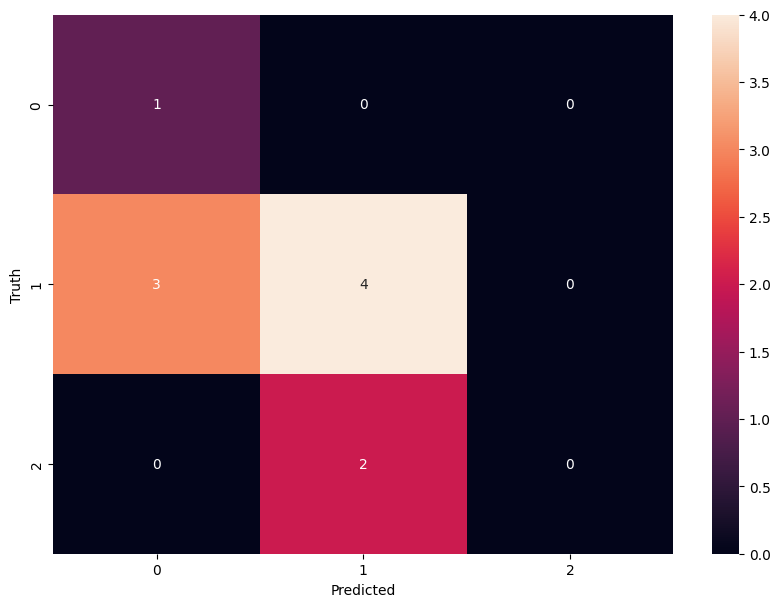

In [154]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')